<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_02/CAP417_HandsOn_02_AlexdeAFernandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **UNDER CONSTRUCTION** ###


# **1. Linear and Angular Coefficients of a y = ax + b equation.**


In [ ]:
install.packages ("cowplot")
install.packages ("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 10 row(s) containing missing values (geom_path).”
Warning message:
“Removed 10 row(s) containing missing values (geom_path).”
Warning message:
“Removed 10 row(s) containing missing values (geom_path).”
Warning message:
“Removed 10 row(s) containing missing values (geom_path).”


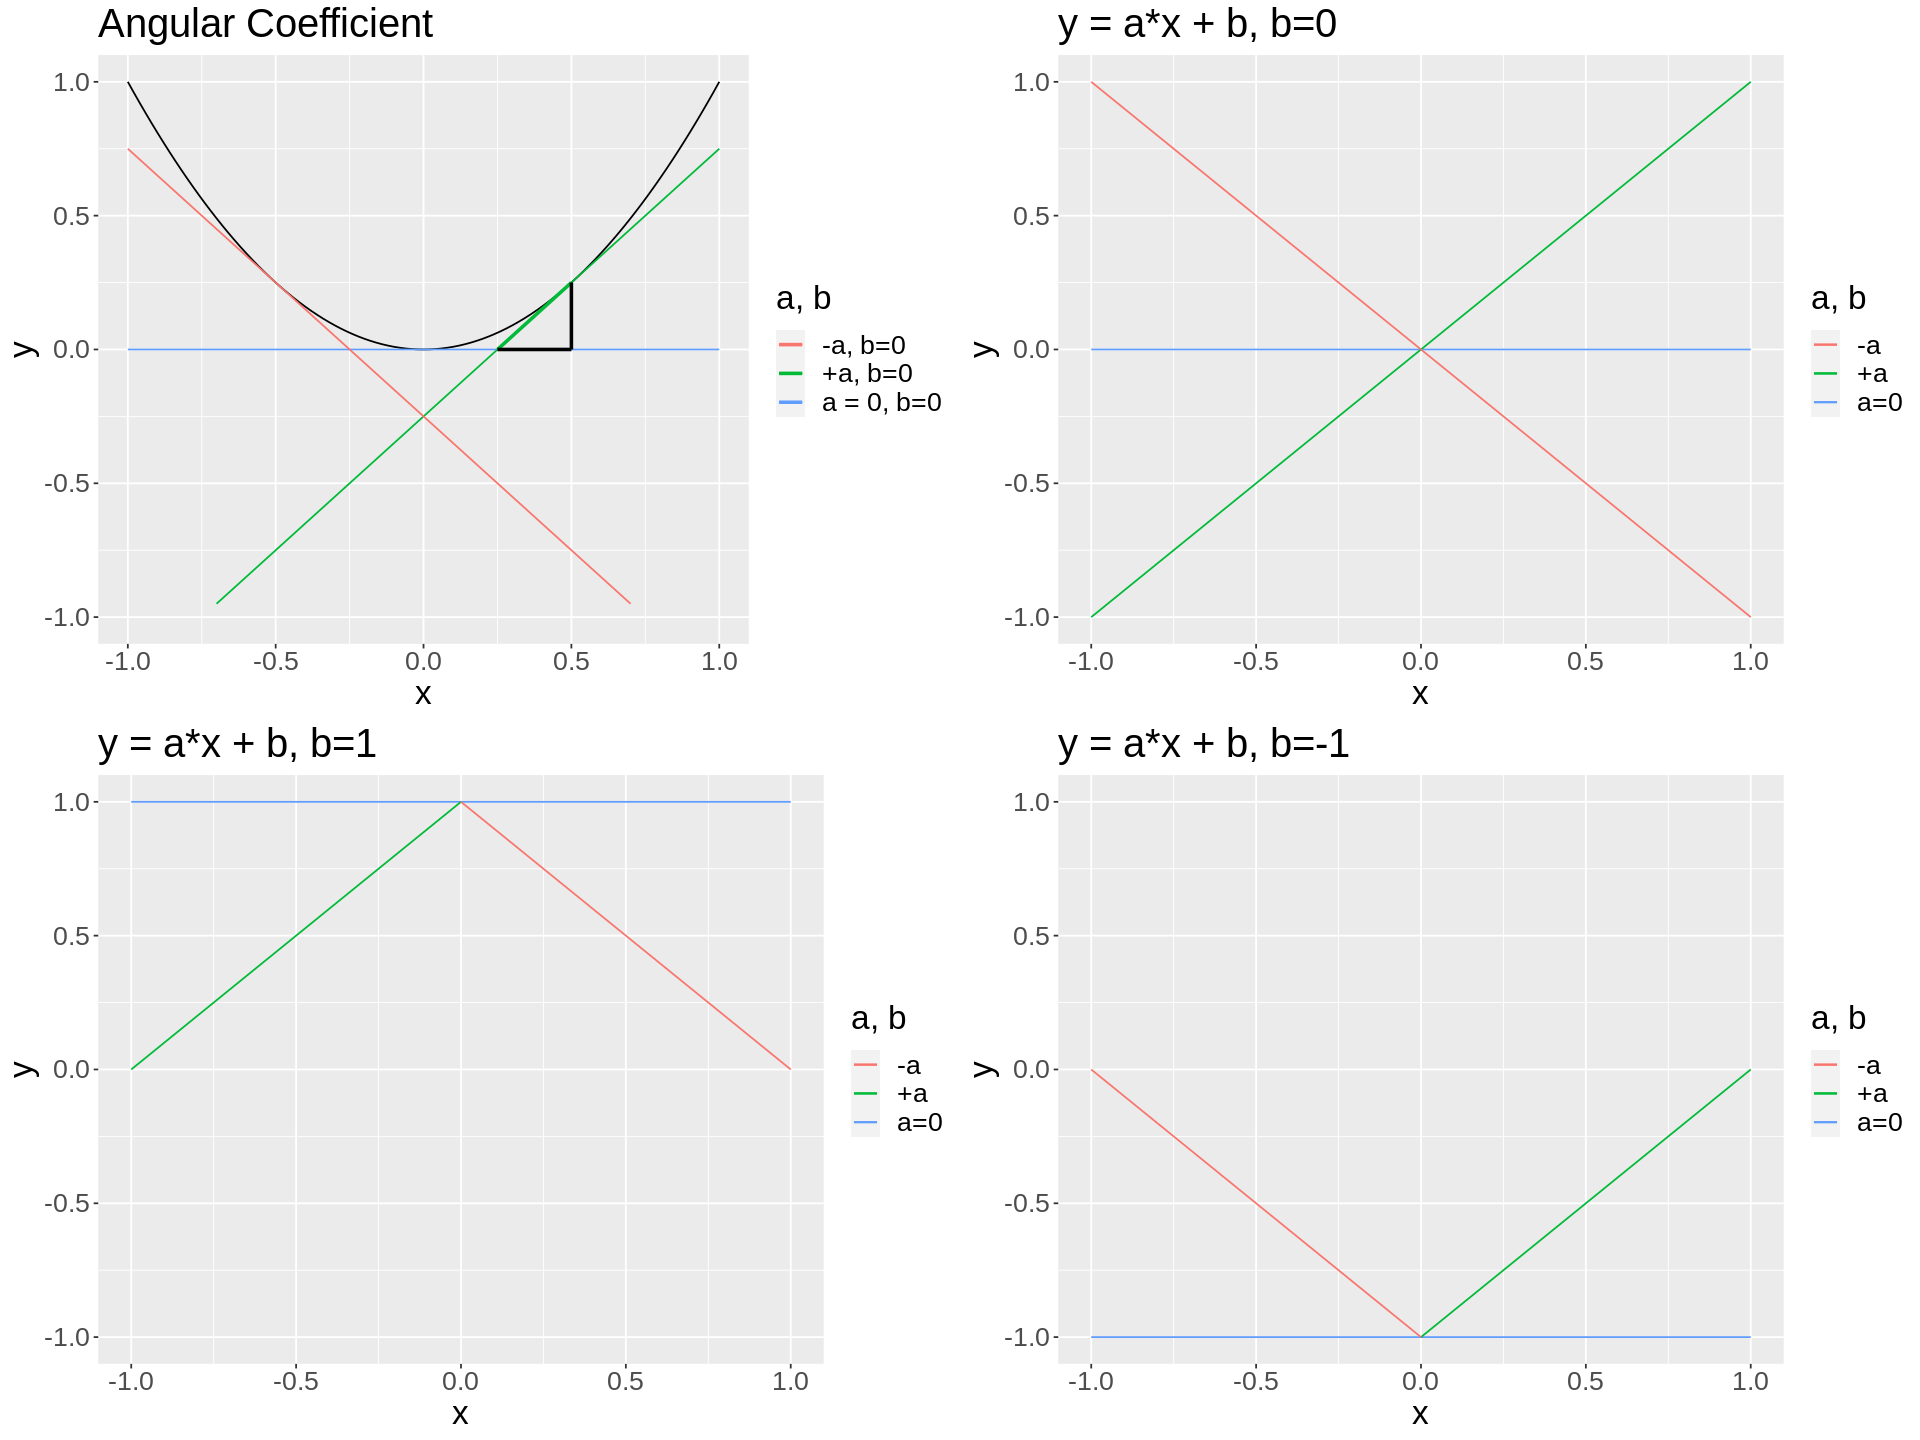

In [ ]:
library (ggplot2)
library (cowplot) # Used to plot multiple graphs on a single figure

f1 <- function (x) {
  return (x^2)
}

a <- function (x) {
  return (2*x)
}
flin <- function (a, x0, y0, xl) {
  y0 <-
  return (a * (xl -x0) + y0)
}

x <- seq (-1, 1, 0.1)
fl <- function (a, b, x) {
  return (a*x + b)
}

p1 <- ggplot () +
  geom_function (fun = f1) +
  geom_line (aes(x=x, y = flin (a(0), 0, 0, x), color = "a = 0, b=0")) +
  geom_line (aes(x=x, y = flin (a(0.5), 0.5, 0.25, x), color = "+a, b=0")) +
  geom_line (aes(x=x, y = flin (a(-0.5), -0.5, 0.25, x), color = "-a, b=0")) + 
  geom_segment(aes (x=0.25, xend=0.5, y=0, yend=0.25, color = "+a, b=0"), lwd = 1 ) +
  geom_segment(aes (x=0.5, xend=0.5, y=0, yend=0.25), lwd = 1 ) +
  geom_segment(aes (x=0.25, xend=0.5, y=0.0, yend=0.0), lwd = 1 ) +
  theme(text = element_text(size=20)) +
  xlab("x") + ylab("y") + labs(color = "a, b") +
  ggtitle ("Angular Coefficient") +
  xlim (-1, 1) + ylim (-1, 1)

p2 <- ggplot () +
  geom_line (aes(x=x, y = fl(0,0, x), color ="a=0")) +
  geom_line (aes(x=x, y = fl(1,0, x), color ="+a")) +
  geom_line (aes(x=x, y = fl(-1,0, x), color ="-a")) +
  theme(text = element_text(size=20)) +  labs(color = "a, b") +
  xlab("x") + ylab("y") +
  ggtitle ("y = a*x + b, b=0") +
  xlim (-1, 1) + ylim (-1,1)


p3 <- ggplot () +
  geom_line (aes(x=x, y = fl(0,1, x), color ="a=0")) +
  geom_line (aes(x=x, y = fl(1,1, x), color ="+a")) +
  geom_line (aes(x=x, y = fl(-1,1, x), color ="-a")) +
  theme(text = element_text(size=20)) +
  xlab("x") + ylab("y") +  labs(color = "a, b") +
  ggtitle ("y = a*x + b, b=1") +
  xlim (-1, 1) + ylim (-1,1)


p4 <- ggplot () +
  geom_line (aes(x=x, y = fl(0,-1, x), color ="a=0")) +
  geom_line (aes(x=x, y = fl(1,-1, x), color ="+a")) +
  geom_line (aes(x=x, y = fl(-1,-1, x), color ="-a")) +
  theme(text = element_text(size=20)) +
  xlab("x") + ylab("y") +  labs(color = "a, b") +
  ggtitle ("y = a*x + b, b=-1") +
  xlim (-1, 1) + ylim (-1,1)

saved <- options(repr.plot.width=16, repr.plot.height=12)
plot_grid(p1, p2, p3, p4)
options (saved)

# **1.1. Linear and Angular Coefficients of a y = ax + b equation.**
* *Inverse Problems*

Given a set of pairs of numbers, what is the value of *a* and *b* in y=a*x + b?
Applied to a set of temperatures, taken hourly, you can see a line approximately intercepting the mean value. This is the best choice for a linear model over a set of hourly temperatures, demonstrated by exhaustive search and the linear model.

* *lsquare function - a Least Square Method Function in R*

For comparison purposes, a function that calculates the linear approximation by least squares method has been implemented, giving the same linear results.

* *Cost/Loss Function*

The cost function chosen was the RMSE, which returns a value without the largest differences being predominant, approximating an average without sign bias, as would be the case using the difference alone.

For example, when using the difference, a mean error between -10 and 10 would give a mean error equal to 0, which would be fine; the RMSE and the square of the difference, however, would provide metrics indicating the size of the error. In turn, the square can greatly increase large differences, and so the absolute difference is more interesting, reducing the effect of outliers. 

**Example in exercise 2, Time series on: Exhaustive_search_TEMPERATURE_local versus global file**



In [ ]:
#functions 

#line function
f <- function (a, b, x) {
  return (a *x + b)
}

#Exhaustive search function
exhaustive_search <- function (Temp, a1, b1, a2, b2) {
  rtemp <- 99999999
  best <- ""
  for (a in seq (a1, a2, 0.1)){ #force a1 to a2 by 0.1
    for (b in seq (b1, b2, 0.1)) {  # force b1 to b2 by 0.1
      y <- f(a, b, x)
      rmse <- sqrt(sum(Temp - y)^2/length(y))
      if (rmse < rtemp) { # write the a and b for the minor RMSE
        rtemp <- rmse
        best <- c(a, b, "rmse = ", rmse)
      }
      #print the search values
      sprintf ("a=%f3, b=%f3, RMSE=%f5", as.double(a), as.double(b), as.double(rmse))
    }
  }
  return (best)
}

#function to calculate a and b using least square method
lsquare <- function (x, y) {
  n <- length(x)
  sum_x <- sum(x)
  sum_y <- sum(y)
  x_sq <- sum(x^2)
  xy <- sum(x*y)

  m <- (n*xy - sum_x*sum_y)/(n*x_sq - sum_x^2)
  b <- (sum_y - m*sum_x)/n

  return(c(m, b))
}


# Standard line definitions; used in the following codes.
a <- 0.15
b <- -7

x <- 1:1000
y <- f(a, b, x)


Warning message in summary.lm(mod):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.984e-13 -2.986e-15  2.480e-16  3.395e-15  2.526e-14 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -7.000e+00  6.856e-16 -1.021e+16   <2e-16 ***
x            1.500e-01  1.187e-18  1.264e+17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.083e-14 on 998 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.598e+34 on 1 and 998 DF,  p-value: < 2.2e-16


[1] "BEST Found: a=0.1500003, b=-7.0000003, RMSE=0.0000005"

[1] "Least Square Function: a=0.150000, b=-7.000000"

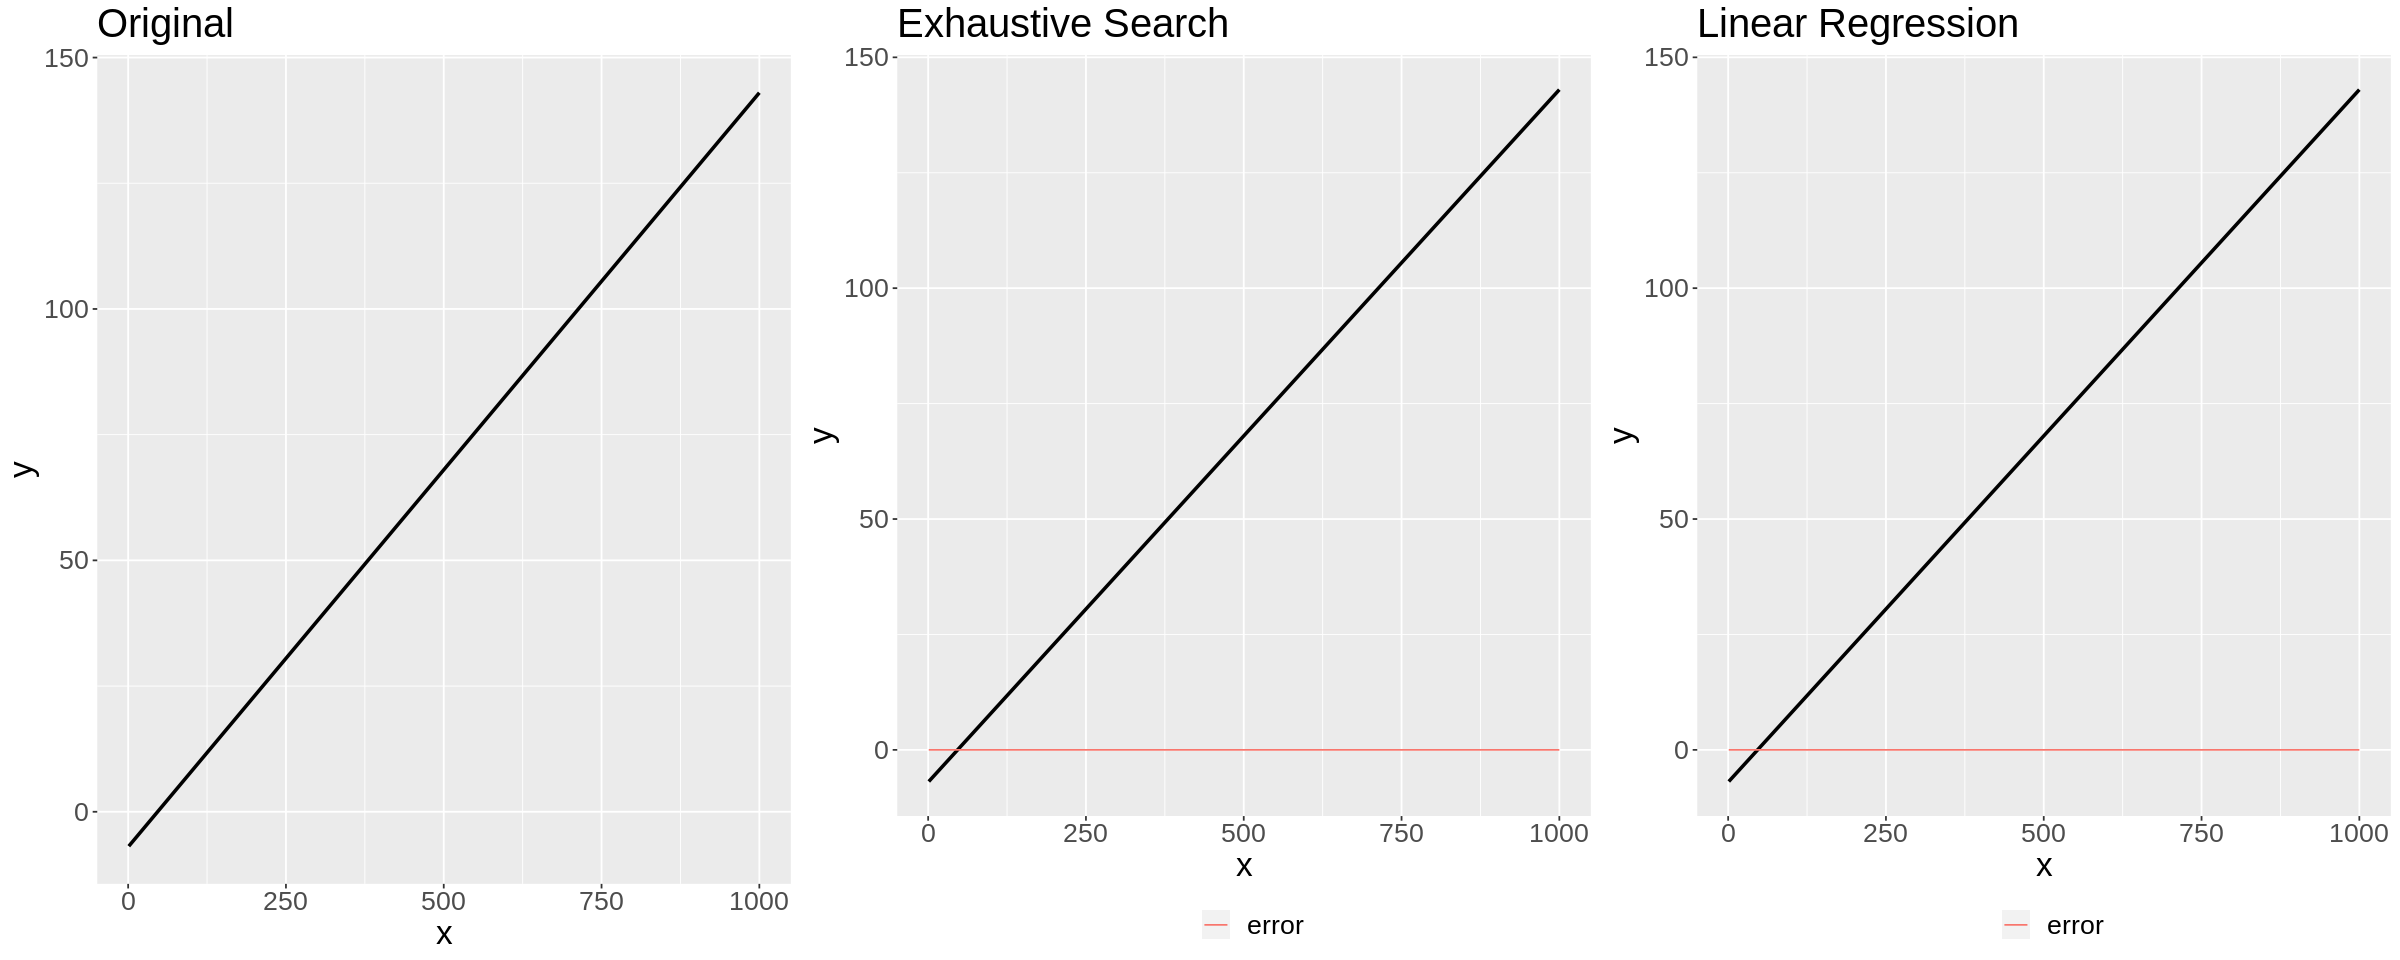

In [ ]:
err <- exhaustive_search(y, -0.25, -10, 0.25, 0)

y_new <- f(as.double(err[1]), as.double(err[2]), x)
mod <- lm(y ~x)
summary(mod)

y_lm <- f(coefficients(mod)[2], coefficients(mod)[1], x)
p1 <- ggplot () +
  geom_line(aes(x = x, y = y), lwd = 1) + 
  theme(text = element_text(size=20)) + ggtitle ('Original') +
  xlab("x") + ylab("y")

p2 <-  ggplot () +
  geom_line(aes(x = x, y= y_new), lwd = 1) +
  geom_line(aes(x=x, y= y-y_new, color = "error")) +
  theme(text = element_text(size=20), legend.position="bottom") + ggtitle ('Exhaustive Search') +
  xlab("x") + ylab("y") + labs(color = "")

 p3 <- ggplot () +
  geom_line(aes(x = x, y= y_lm), lwd = 1) +
  geom_line(aes(x=x, y= y-y_lm, color = "error")) +
  theme(text = element_text(size=20), legend.position="bottom") + ggtitle ('Linear Regression') +
  xlab("x") + ylab("y") + labs(color = "")

saved <- options(repr.plot.width=20, repr.plot.height=8)
plot_grid (p1, p2, p3, ncol = 3)
options(saved)

sprintf ("BEST Found: a=%f3, b=%f3, RMSE=%f5", as.double(err[1]), as.double(err[2]), as.double(err[4]))
y_lsquare <- lsquare(x,y)
sprintf ("Least Square Function: a=%f, b=%f", y_lsquare[1], y_lsquare[2])


# **1.2. Noise Add**

Noise is something inherent in the data acquisition process, errors in measurements, in sensors, among others, that end up generating meaningless information.
They can also come from processes in which not all the acting variables are known, bringing about noise information. 

Adding noise to a well-known signal does not affect the mean in a determinate way, but increases the variance according to the magnitude of the noise.

When multiplying a noise by a signal, the variance increases enormously according to the increase in noise, and the mean changes to near zero.

Multiplying and adding noise keeps the mean close to the original, and the variance increasing enormously with increasing noise.

[1] "line           :           68.075000, 1876.875000"

[1] "add noise : mean 68.20323212,   n5 1879.88223312,   n20 2014.60940212,   n50 2768.56810512"

[1] "mult noise: mean 4.58311612,   n5 56404.74313012,   n20 813257.75646512,   n50 5121954.87009012"

[1] "add & mult:  mean 0.08899512,  n5 49666.40695012,   n20 900129.26536312,   n50 5962919.97942512"

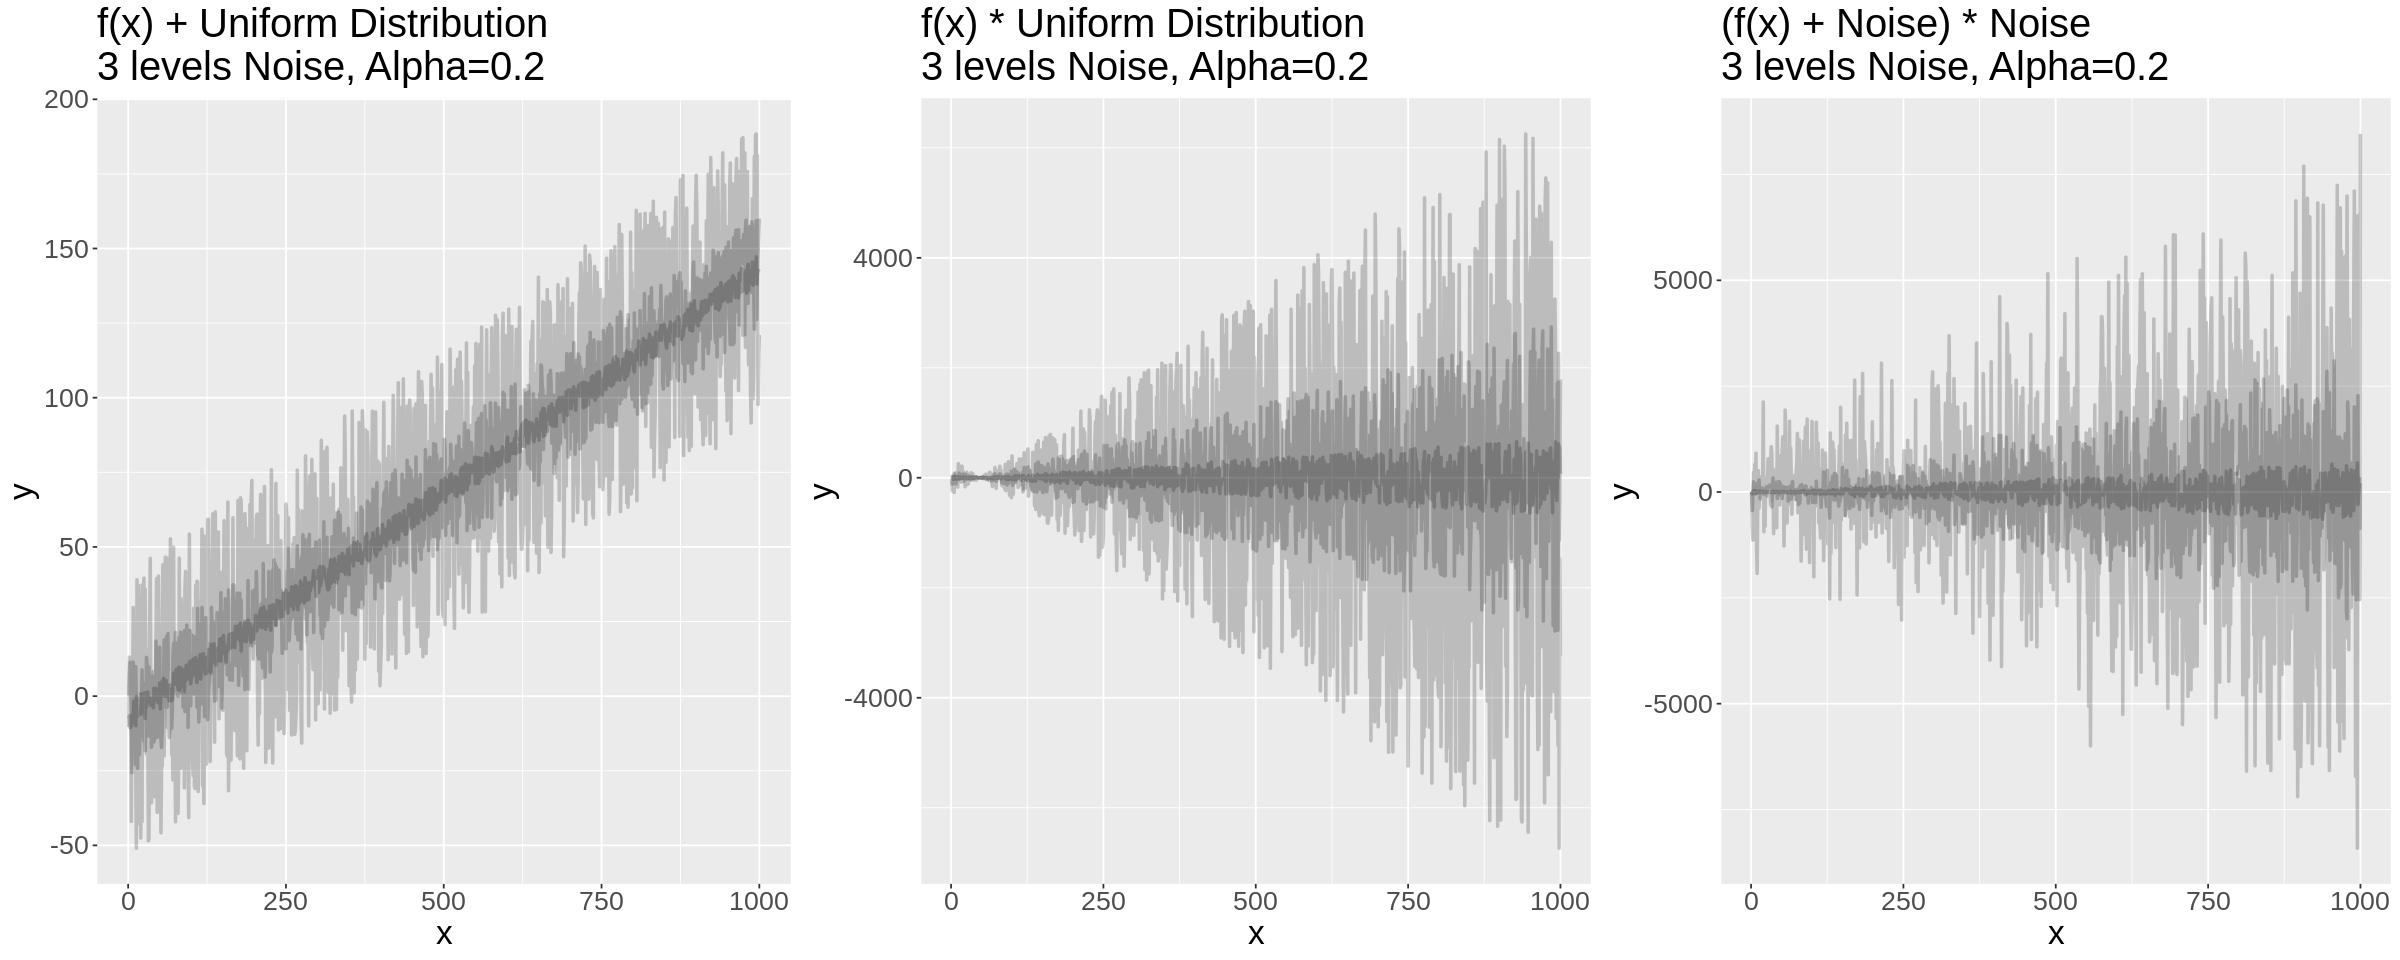

In [ ]:
y1 <- f(a, b, x) + runif(length(x), min=-5, max=5)
y2 <- f(a, b, x) + runif(length(x), min=-20, max=20)
y3 <- f(a, b, x) + runif(length(x), min=-50, max=50)

p1 <- ggplot () +
  geom_line(aes(x = x, y = y1), lwd = 1, alpha = 0.2) + 
  geom_line(aes(x = x, y = y2), lwd = 1, alpha = 0.2) + 
  geom_line(aes(x = x, y = y3), lwd = 1, alpha = 0.2) + 
  theme(text = element_text(size=20)) + ggtitle ('f(x) + Uniform Distribution\n3 levels Noise, Alpha=0.2') +
  xlab("x") + ylab("y")


y4 <- f(a, b, x) * runif(length(x), min=-5, max=5)
y5 <- f(a, b, x) * runif(length(x), min=-20, max=20)
y6 <- f(a, b, x) * runif(length(x), min=-50, max=50)

p2 <- ggplot () +
  geom_line(aes(x = x, y = y4), lwd = 1, alpha = 0.2) + 
  geom_line(aes(x = x, y = y5), lwd = 1, alpha = 0.2) + 
  geom_line(aes(x = x, y = y6), lwd = 1, alpha = 0.2) + 
  theme(text = element_text(size=20)) + ggtitle ('f(x) * Uniform Distribution\n3 levels Noise, Alpha=0.2') +
  xlab("x") + ylab("y")

y7 <- (f(a, b, x)  + runif(length(x), min=-5, max=5) ) * runif(length(x), min=-5, max=5)
y8 <- (f(a, b, x) + runif(length(x), min=-20, max=20) ) * runif(length(x), min=-20, max=20) 
y9 <- (f(a, b, x) + runif(length(x), min=-50, max=50) ) * runif(length(x), min=-50, max=50) 

p3 <- ggplot () +
  geom_line(aes(x = x, y = y7), lwd = 1, alpha = 0.2) + 
  geom_line(aes(x = x, y = y8), lwd = 1, alpha = 0.2) + 
  geom_line(aes(x = x, y = y9), lwd = 1, alpha = 0.2) + 
  theme(text = element_text(size=20)) + ggtitle ('(f(x) + Noise) * Noise\n3 levels Noise, Alpha=0.2') +
  xlab("x") + ylab("y")


saved <- options(repr.plot.width=20, repr.plot.height=8)
plot_grid(p1, p2, p3, ncol=3)
options (saved)

sprintf("line           :           %f, %f", mean(y), var(y))
sprintf("add noise : mean %f12,   n5 %f12,   n20 %f12,   n50 %f12",mean(y1), var(y1), var(y2), var(y3))
sprintf("mult noise: mean %f12,   n5 %f12,   n20 %f12,   n50 %f12",mean(y4), var(y4), var(y5), var(y6))
sprintf("add & mult:  mean %f12,  n5 %f12,   n20 %f12,   n50 %f12",mean(y7), var(y7), var(y8), var(y9))



* *Additive Noise*

Additive noise maintains the line pattern by adding variation along the line. Thus, unless the noise is very large, the search/calculation of *a* and *b* is not greatly interfered with. 

The amount of noise can be defined as the range of the random distribution function, in this case the uniform distribution, which was used.


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5405 -4.9782 -0.5666  5.2100 10.5464 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.6071770  0.3717679  -20.46   <2e-16 ***
x            0.1501957  0.0006434  233.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.874 on 998 degrees of freedom
Multiple R-squared:  0.982,	Adjusted R-squared:  0.982 
F-statistic: 5.449e+04 on 1 and 998 DF,  p-value: < 2.2e-16


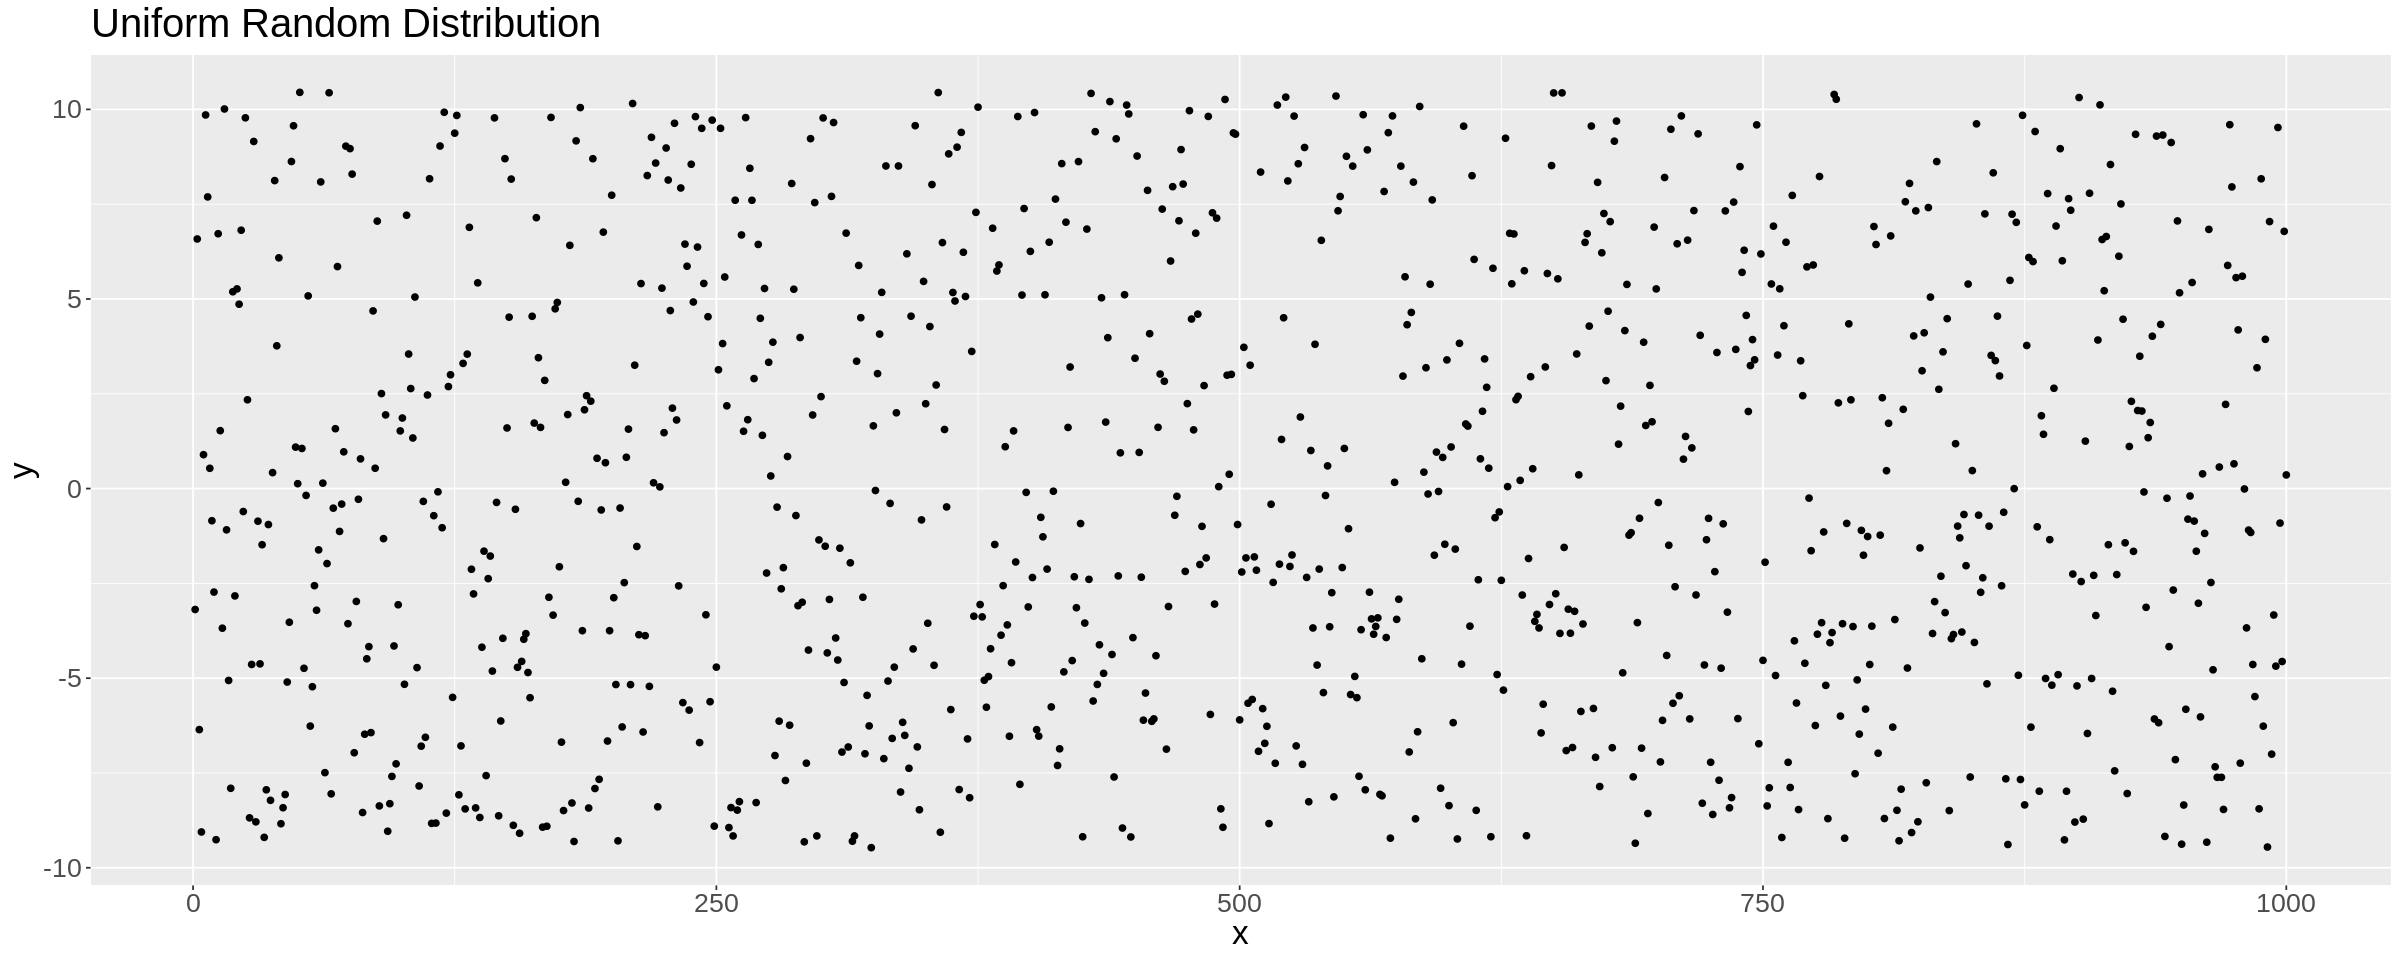

[1] "BEST Found: a=0.1500003, b=-7.5000003, RMSE=0.2919555"

[1] "Least Square Function: a=0.150196, b=-7.607177"

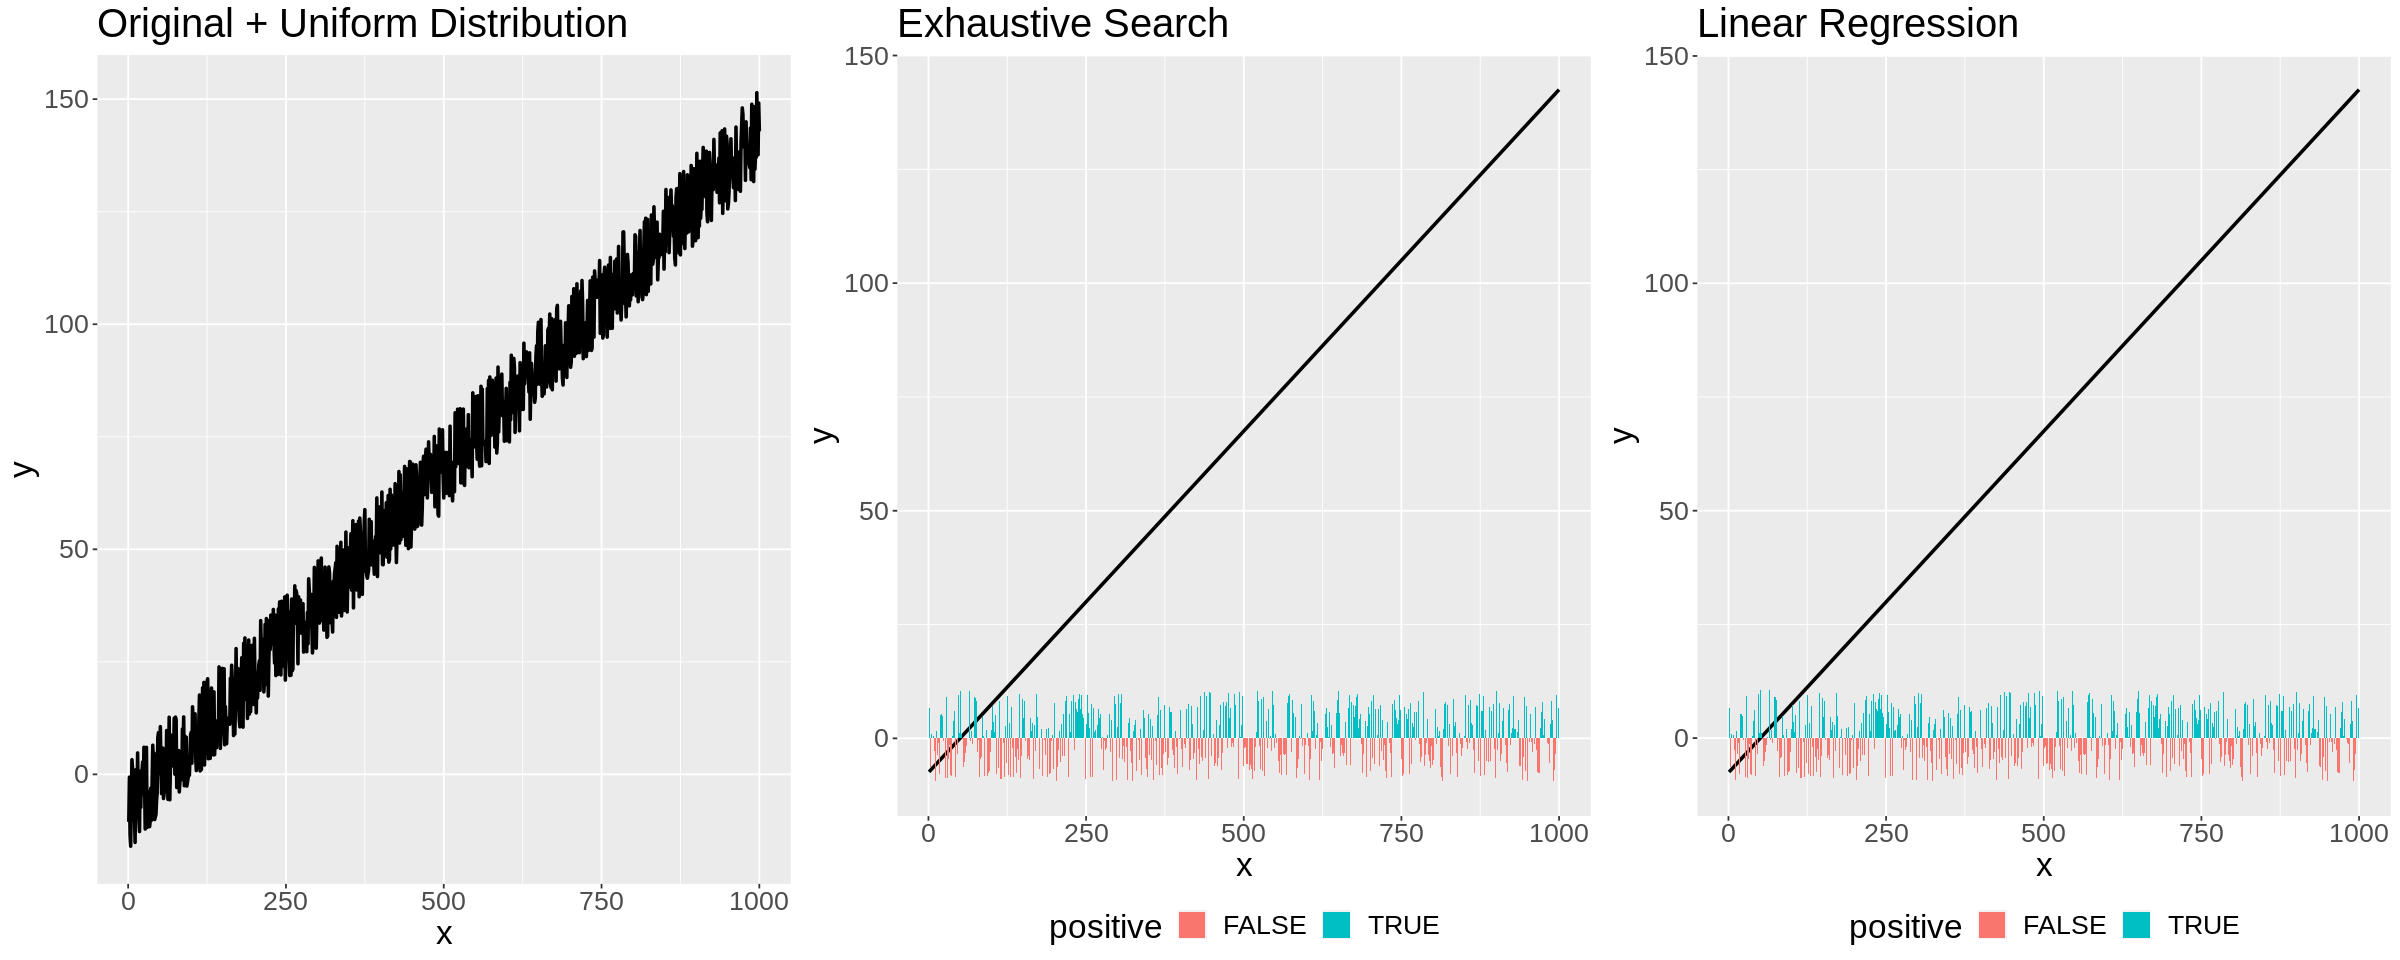

In [ ]:

a <- 0.15
b <- -7

x <- 1:1000
y <- f(a, b, x) + runif(length(x), min=-10, max=10)

err <- exhaustive_search(y, -0.25, -10, 0.25, 0)

y_new <- f(as.double(err[1]), as.double(err[2]), x)
mod <- lm(y ~x)
summary(mod)

y_lm <- f(coefficients(mod)[2], coefficients(mod)[1], x)

p1 <- ggplot () +
  geom_line(aes(x = x, y = y), lwd = 1) + 
  theme(text = element_text(size=20)) + ggtitle ('Original + Uniform Distribution') +
  xlab("x") + ylab("y")

p2 <-  ggplot () +
  geom_line(aes(x = x, y= y_new), lwd = 1) +
  geom_col(aes(x=x, y= y-y_new, fill = y-y_new>0)) +
  theme(text = element_text(size=20), legend.position="bottom") + ggtitle ('Exhaustive Search') +
  xlab("x") + ylab("y")+ labs(fill = "positive")

 p3 <- ggplot () +
  geom_line(aes(x = x, y= y_lm), lwd = 1) +
  geom_col(aes(x=x, y= y-y_lm, fill = y-y_lm>0)) +
  theme(text = element_text(size=20), legend.position="bottom") + ggtitle ('Linear Regression') +
  xlab("x") + ylab("y") + labs(fill = "positive")


ggplot () +
  geom_point(aes (x = 1:length(y) , y = y-y_new)) +
  theme(text = element_text(size=20), legend.position="bottom") + ggtitle ('Uniform Random Distribution') +
  xlab("x") + ylab("y") + labs(color = "")


saved <- options(repr.plot.width=20, repr.plot.height=8)
plot_grid (p1, p2, p3, ncol = 3)
options(saved)

sprintf ("BEST Found: a=%f3, b=%f3, RMSE=%f5", as.double(err[1]), as.double(err[2]), as.double(err[4]))
y_lsquare <- lsquare(x,y)
sprintf ("Least Square Function: a=%f, b=%f", y_lsquare[1], y_lsquare[2])



* *Multiplicative Noise*

Multiplicative noise changes the graph a lot, definitely changing the pattern of the line and disturbing the search for *a* and *b*, which will eventually approach the mean value, or 0. 


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1477.2  -237.2     8.6   249.5  1260.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -11.96593   28.81758  -0.415    0.678
x             0.06705    0.04988   1.344    0.179

Residual standard error: 455.3 on 998 degrees of freedom
Multiple R-squared:  0.001807,	Adjusted R-squared:  0.0008071 
F-statistic: 1.807 on 1 and 998 DF,  p-value: 0.1792


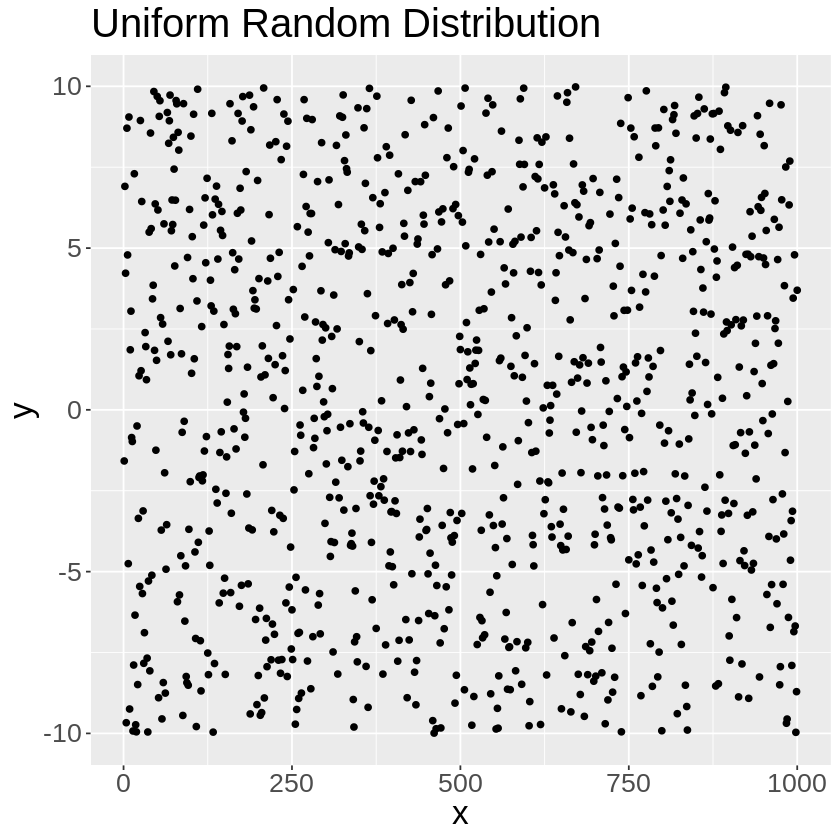

[1] "BEST Found: a=0.0500003, b=-3.4000003, RMSE=1.1010605"

[1] "Least Square Function: a=0.067045, b=-11.965930"

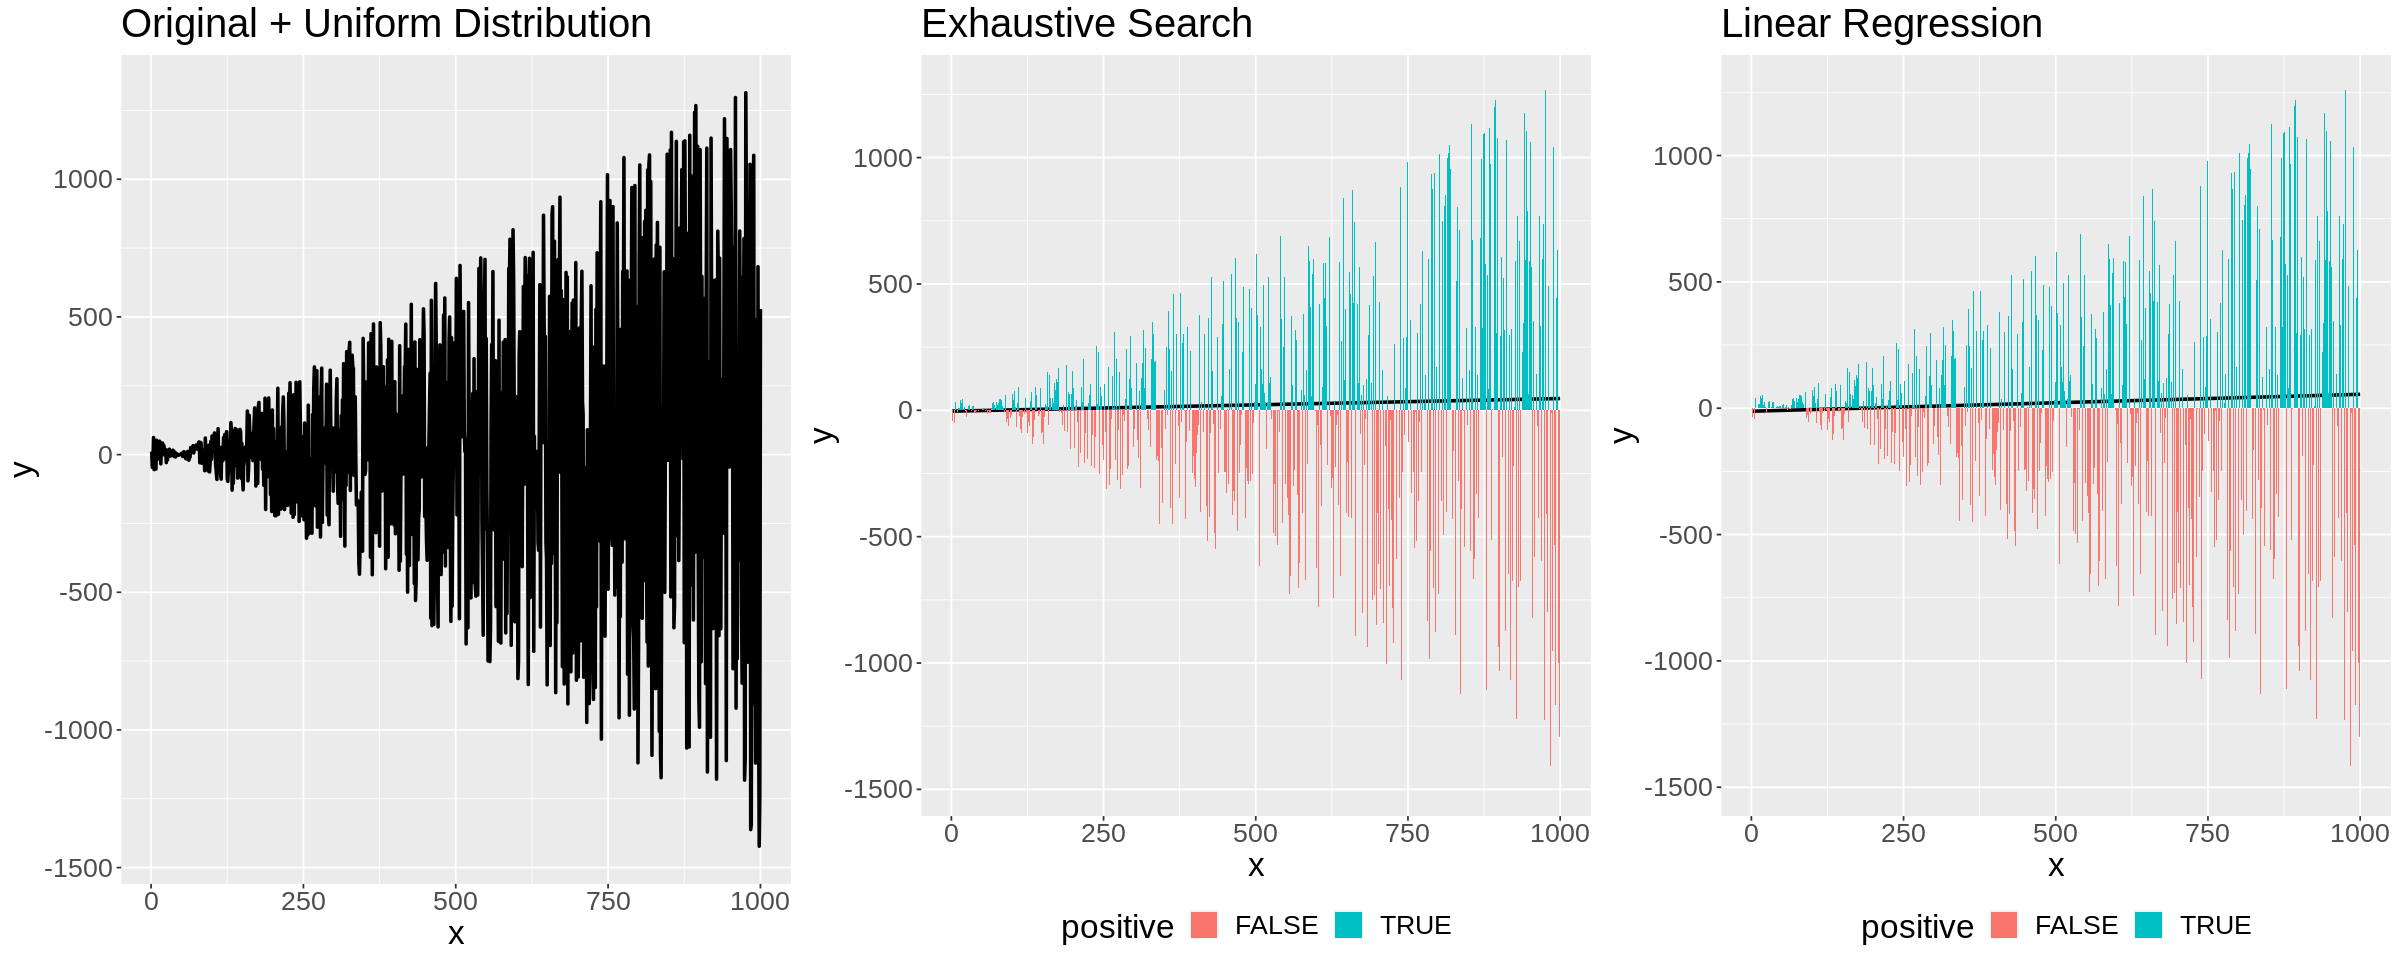

In [ ]:


a <- 0.15
b <- -7
noise <- runif(length(x), min=-10, max=10)
y <- f(a, b, x) * noise

err <- exhaustive_search(y, -0.25, -10, 0.25, 0)

y_new <- f(as.double(err[1]), as.double(err[2]), x)
mod <- lm(y ~x)
summary(mod)

y_lm <- f(coefficients(mod)[2], coefficients(mod)[1], x)

p1 <- ggplot () +
  geom_line(aes(x = x, y = y), lwd = 1) + 
  theme(text = element_text(size=20)) + ggtitle ('Original + Uniform Distribution') +
  xlab("x") + ylab("y")

p2 <-  ggplot () +
  geom_line(aes(x = x, y= y_new), lwd = 1) +
  geom_col(aes(x=x, y= y-y_new, fill = y-y_new>0)) +
  theme(text = element_text(size=20), legend.position="bottom") + ggtitle ('Exhaustive Search') +
  xlab("x") + ylab("y") + labs(  fill = "positive")

 p3 <- ggplot () +
  geom_line(aes(x = x, y= y_lm), lwd = 1) +
  geom_col(aes(x=x, y= y-y_lm, fill = y-y_lm>0)) +
  theme(text = element_text(size=20), legend.position="bottom") + ggtitle ('Linear Regression') +
  xlab("x") + ylab("y") + labs(fill = "positive")


ggplot () +
  geom_point(aes (x = 1:length(y) , y = noise)) +
  theme(text = element_text(size=20), legend.position="bottom") + ggtitle ('Uniform Random Distribution') +
  xlab("x") + ylab("y") + labs(color = "")


saved <- options(repr.plot.width=20, repr.plot.height=8)
plot_grid (p1, p2, p3, ncol = 3)
options(saved)

sprintf ("BEST Found: a=%f3, b=%f3, RMSE=%f5", as.double(err[1]), as.double(err[2]), as.double(err[4]))
y_lsquare <- lsquare(x,y)
sprintf ("Least Square Function: a=%f, b=%f", y_lsquare[1], y_lsquare[2])


# **1.3. *a* and *b* Parameters Search Surfce**

RMSE determines high values by heavily weighting outliers and larger differences. Thus the mean absolute error was used, so that the gradient of the error points would be more evident. 
The best value point was plotted in red, smaller MAE in dark blue. 
Each point represents the parameters *a* and *b* and the color scale the MAE.

Linear without noise...

Warning message:
“Removed 1 rows containing missing values (geom_point).”


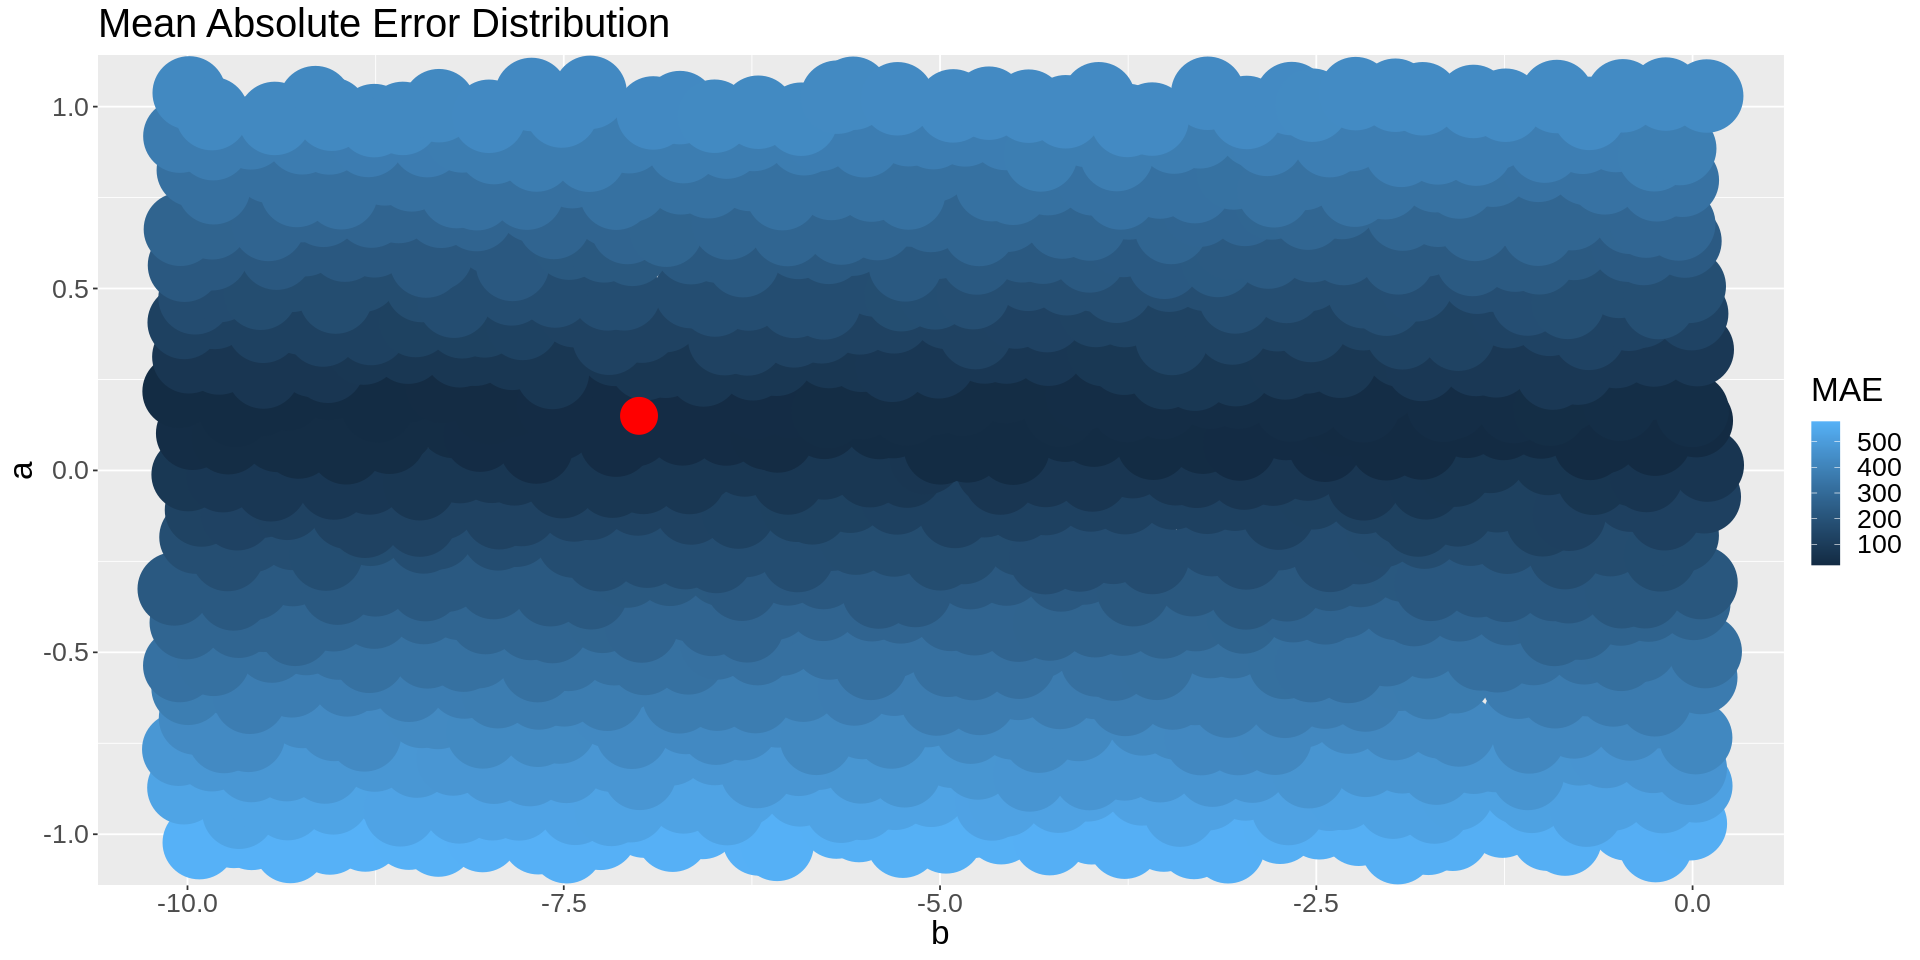

In [ ]:
library (ggplot2)
library (cowplot)


f <- function (a, b, x) {
  return (a *x + b)
}

#Exhaustive search function
exhaustive_search <- function (Temp, a1, b1, a2, b2) {
  rtemp <- 99999999
  best <- ""
  for (a in seq (a1, a2, 0.1)){ #force a1 to a2 by 0.1
    for (b in seq (b1, b2, 0.25)) {  # force b1 to b2 by 0.1
      y <- f(a, b, x)
      rmse <- sqrt(sum(Temp - y)^2/length(y))
      mae <- ave(abs(Temp -y))
      if (rmse < rtemp) { # write the a and b for the minor RMSE
        rtemp <- rmse
      }
      #print the search values
      sprintf ("a=%f3, b=%f3, RMSE=%f5", as.double(a), as.double(b), as.double(rmse))
      best <- rbind(best, c(a, b, rmse, mae))
    }
  }
  return (best)
}


#function to calculate a and b using least square method
lsquare <- function (x, y) {
  n <- length(x)
  sum_x <- sum(x)
  sum_y <- sum(y)
  x_sq <- sum(x^2)
  xy <- sum(x*y)

  m <- (n*xy - sum_x*sum_y)/(n*x_sq - sum_x^2)
  b <- (sum_y - m*sum_x)/n

  return(c(m, b))
}

a <- 0.15
b <- -7

x <- 1:1000
y <- f(a, b, x)

err <- exhaustive_search(y, -1, -10, 1, 0)

saved <- options(repr.plot.width=16, repr.plot.height=8)
ggplot () +
  geom_jitter (aes(x=as.numeric(err[,2]), y=as.numeric(err[,1]), color=as.numeric(err[,4])), size = 20) +
  geom_point (aes(x=b, y=a, color='Best'), color='red', size=10) +
  scale_colour_gradient () +
  scale_x_continuous () +
  scale_y_continuous () +
  theme(text = element_text(size=20), legend.position="right") + ggtitle ('Mean Absolute Error Distribution') +
  xlab("b") + ylab("a") + labs(color = "MAE")
options(saved)

# **Exhaustive Search Optimizations**

We see in the graph above, that the variables *a* and *b* are independent, and that the domain of the smallest error lies at *a* (almost a straight line on the y-axis). Thus, a possible optimization of the code is to linearize the search, going from order O(n^2) of *exhaustive_search()* to O(n) of *exhaustive_search2()*, which greatly reduces the processing time.

* **exhaustive_search ()   - O(n^2)**

[1] "0.15"     "-7"   "rmse = "  "2.19566120791399e-12"

   user  system    **elapsed**

  0.274   0.016     **0.291 seconds** 



* **exhaustive_search2 ()   - O(n)**

[1] "0.15"    "-7"      "rmse = " "0"   

   user  system    **elapsed**

  0.017   0.000     **0.016 seconds** 

Time consistent with algorithm orders, without the need for multiple runtime validations.


In [ ]:
#Exhaustive search function  - O(n^2)
exhaustive_search <- function (Temp, a1, b1, a2, b2) {
  rtemp <- 99999999
  best <- ""
  for (a in seq (a1, a2, 0.05)){ #force a1 to a2 by 0.1
    for (b in seq (b1, b2, 0.05)) {  # force b1 to b2 by 0.1
      y <- f(a, b, x)
      rmse <- sqrt(sum(Temp - y)^2/length(y))
      if (rmse < rtemp) { # write the a and b for the minor RMSE
        rtemp <- rmse
        best <- c(a, b, "rmse = ", rmse)
      }
      #print the search values
      sprintf ("a=%f3, b=%f3, RMSE=%f5", as.double(a), as.double(b), as.double(rmse))
    }
  }
  return (best)
}

#Exhaustive search function 2 - O(n)
exhaustive_search2 <- function (Temp, a1, b1, a2, b2) {
  rtemp <- 99999999
  best <- ""
  
  b <- (b1 + b2)/2

  for (a in seq (a1, a2, 0.05)){ 
    y <- f(a, b, x)
    rmse <- sqrt(sum(Temp - y)^2/length(y))
    if (rmse < rtemp) { # write the a and b for the minor RMSE
      rtemp <- rmse
      best <- c(a, b, "rmse = ", rmse)
     }
  }

  a <- as.numeric(best[1])

  for (b in seq (b1, b2, 0.05)) {  # force b1 to b2 by 0.1
    y <- f(a, b, x)
    rmse <- sqrt(sum(Temp - y)^2/length(y))
    if (rmse < rtemp) { # write the a and b for the minor RMSE
      rtemp <- rmse
      best <- c(a, b, "rmse = ", rmse)
    }
  }

  return (best)
}

a <- 0.15
b <- -7

x <- 1:1000
y <- f(a, b, x)

system.time (err <- exhaustive_search(y, -1, -10, 1, 10))
print (err)

system.time (err2 <- exhaustive_search2(y, -1, -10, 1, 10))
print (err2)


   user  system elapsed 
  0.274   0.016   0.291 

[1] "0.15"                 "-7"                   "rmse = "             
[4] "2.19566120791399e-12"


   user  system elapsed 
  0.017   0.000   0.016 

[1] "0.15"    "-7"      "rmse = " "0"      
